# Part II Explanatory - Understanding Borrower Behavior: Analysing Prosper Loan Data
## by Lucas Comora

## Investigation Overview


The goal of this investigation is to understand how different borrower characteristics influence the Borrower APR (Annual Percentage Rate) on loans issued through Prosper, a peer-to-peer lending platform.

Through a combination of univariate, bivariate, and multivariate visualizations, we explored how features such as Prosper Rating, Income Range, Loan Term, and Debt-to-Income Ratio interact to shape lending decisions and borrower risk.

The analysis seeks to answer:

* What drives differences in APR between borrowers?

* How do borrower ratings and income levels relate to the terms they receive?

* What role do loan amount, term, and other financial metrics play?

By uncovering the relationships between these variables, we aim to provide insight into borrower risk profiling, loan accessibility, and interest rate determination on the Prosper platform.


## Dataset Overview and Executive Summary

The dataset comes from Prosper, a U.S.-based peer-to-peer lending marketplace. It includes data on:

* Loan performance

* Borrower profiles

* Loan terms

* Credit ratings

* Financial indicators (like income and debt)

From the original dataset, we focused on variables relevant to loan pricing and borrower risk, including:

* BorrowerAPR

* ProsperRating (Alpha)

* IncomeRange

* LoanOriginalAmount

* Term

* DebtToIncomeRatio

* StatedMonthlyIncome

* LoanStatus

We performed data cleaning to remove missing values and irrelevant variables and filtered the dataset for valid loan entries only.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore")

In [2]:
#load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
from utils import clean_prosper_data

df_clean = clean_prosper_data(df)

## Visualization 1: Borrower APR by Prosper Rating

#### How does Prosper Rating affect the interest rate (APR) offered to borrowers?

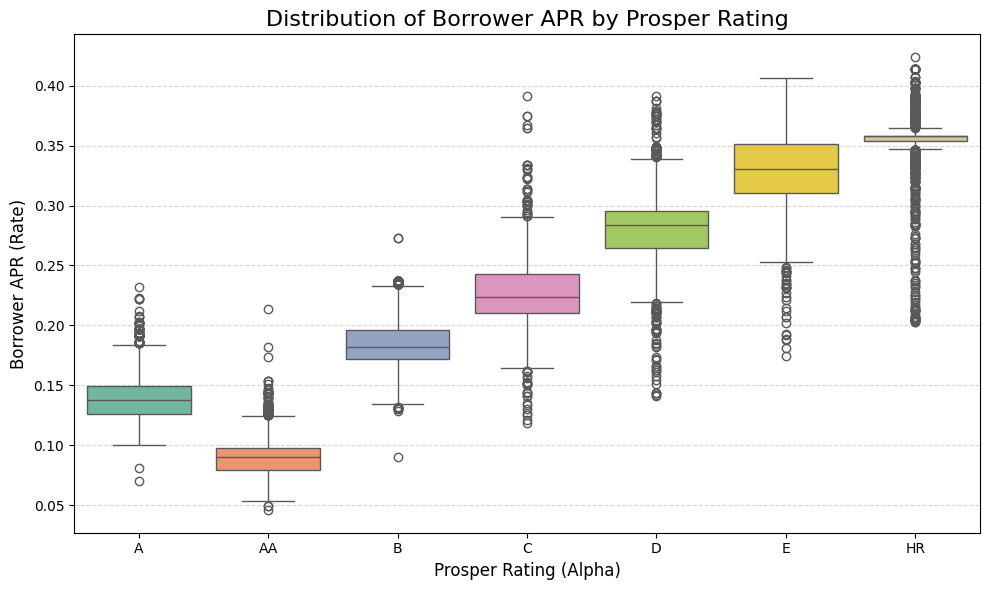

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='ProsperRating (Alpha)',
    y='BorrowerAPR',
    order=sorted(df_clean['ProsperRating (Alpha)'].unique()),
    palette='Set2'
)
plt.title('Distribution of Borrower APR by Prosper Rating', fontsize=16)
plt.xlabel('Prosper Rating (Alpha)', fontsize=12)
plt.ylabel('Borrower APR (Rate)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> There is a strong inverse relationship between Prosper Rating and APR. Borrowers with higher credit ratings (AA, A, B) consistently receive lower APRs. Conversely, borrowers with lower ratings (E, HR) experience significantly higher APRs. This confirms that Prosper Rating is a powerful proxy for borrower risk and a direct driver of interest rates.

## Visualization 2: Borrower APR vs. Loan Amount (with Term and Prosper Rating)

#### How do Loan Amount, Loan Term, and Prosper Rating interact with Borrower APR?

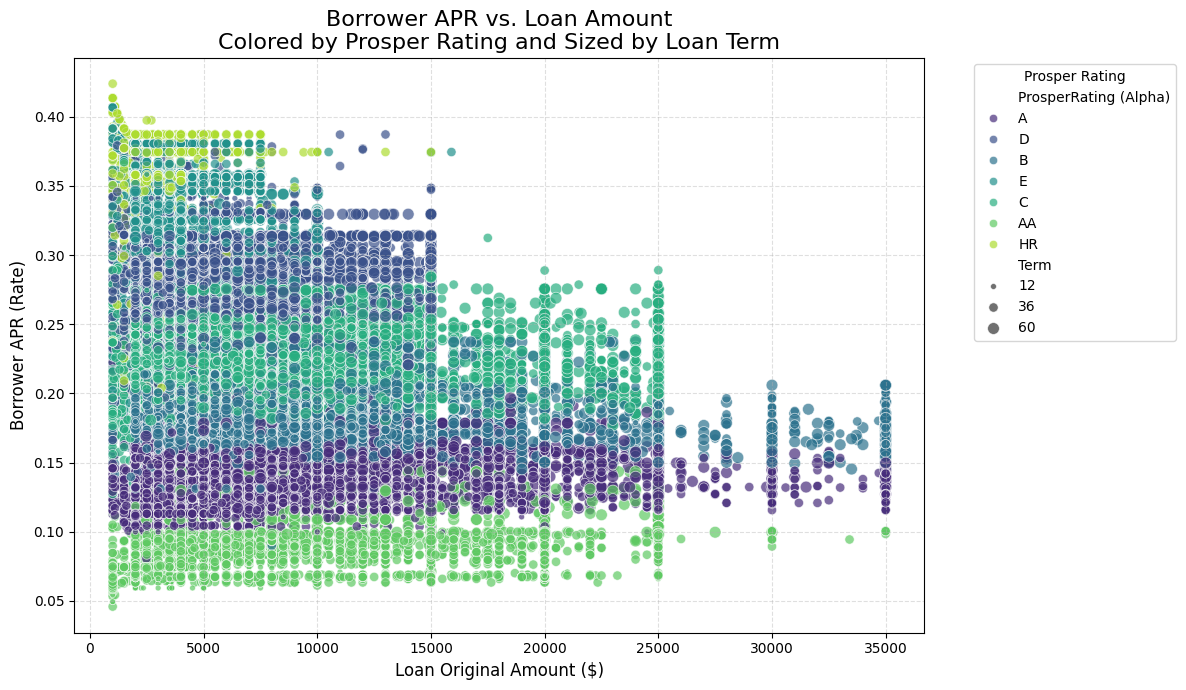

In [5]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_clean,
    x='LoanOriginalAmount',
    y='BorrowerAPR',
    hue='ProsperRating (Alpha)',
    size='Term',
    palette='viridis',
    alpha=0.7
)
plt.title('Borrower APR vs. Loan Amount\nColored by Prosper Rating and Sized by Loan Term', fontsize=16)
plt.xlabel('Loan Original Amount ($)', fontsize=12)
plt.ylabel('Borrower APR (Rate)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Prosper Rating')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

> Borrowers with higher Prosper Ratings often receive larger loans at lower APRs. Additionally, loans with longer terms (larger dots) tend to come with slightly higher APRs, even when credit ratings are similar. This shows that loan pricing is a trade-off between loan size, term duration, and borrower credit quality.

## Visualization 3: Income Distribution Across Prosper Ratings

#### How does Income Range relate to Prosper Ratings?

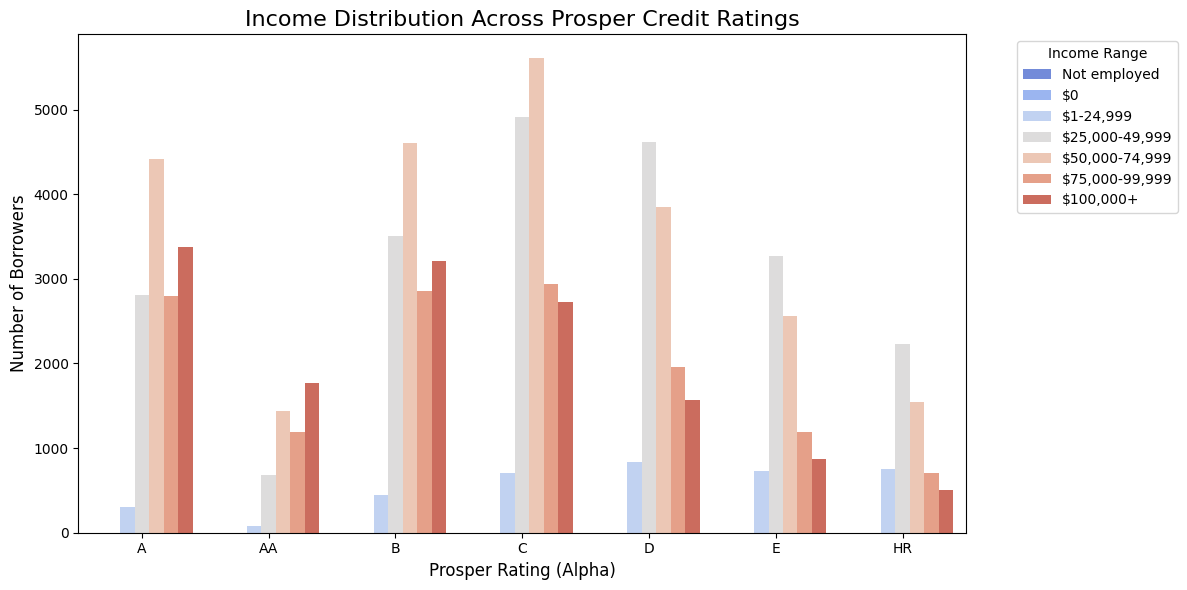

In [6]:
income_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999',
                '$50,000-74,999', '$75,000-99,999', '$100,000+']

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_clean,
    x='ProsperRating (Alpha)',
    hue='IncomeRange',
    order=sorted(df_clean['ProsperRating (Alpha)'].unique()),
    hue_order=income_order,
    palette='coolwarm'
)
plt.title('Income Distribution Across Prosper Credit Ratings', fontsize=16)
plt.xlabel('Prosper Rating (Alpha)', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


> There’s a clear positive trend: higher incomes are more common among higher Prosper Ratings. Borrowers in the $75,000+ bracket dominate the AA, A, and B groups. On the other hand, lower-income borrowers are overrepresented in the lower credit ratings (C to HR). This reflects how Prosper likely uses income strength in evaluating borrower risk.